## Building the graph

In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def makeUpGraph(graph, df, columns):
    pos={}
    df.apply(lambda e: pos.update({e[columns[0]]:(e[columns[1]], e[columns[2]])}), axis=1)
    nx.draw(graph, pos,with_labels=True, node_size= 5000, alpha=0.55, cmap= plt.cm.RdPu,
        node_color= np.arange(graph.number_of_nodes()))


In [3]:
import os
from path import Path
PROJ_DIR = Path().getcwd().parent
DATA_DIR = PROJ_DIR / "data"
os.chdir (PROJ_DIR)

In [4]:
from scripts.src.BuiderGraphWithRtree import BuilderGraphWithRtree
from scripts.src.BuilderGraphNearestNeighbors import BuilderGraphNearestNeighbors
from scripts.src.BuilderGraph import BuilderGraph
from scripts.src.BuilderGraphWithMerge import BuilderGraphWithMerge

In [5]:
import json

with open(DATA_DIR/'dpc-covid19-ita-province.json') as f:
         d= json.load(f) 
json.dumps(d)
covid19_dataset=pd.DataFrame(d)
covid19_dataset.head()

,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi,note_it,note_en
0,2020-02-24T18:00:00,ITA,13,Abruzzo,69,Chieti,CH,42.351032,14.167546,0,,
1,2020-02-24T18:00:00,ITA,13,Abruzzo,66,L'Aquila,AQ,42.351222,13.398438,0,,
2,2020-02-24T18:00:00,ITA,13,Abruzzo,68,Pescara,PE,42.464584,14.213648,0,,
3,2020-02-24T18:00:00,ITA,13,Abruzzo,67,Teramo,TE,42.658918,13.704400,0,,
4,2020-02-24T18:00:00,ITA,13,Abruzzo,979,In fase di definizione/aggiornamento,,0.000000,0.000000,0,,


In [6]:
covid19_dataset.columns

Index(['data', 'stato', 'codice_regione', 'denominazione_regione',
       'codice_provincia', 'denominazione_provincia', 'sigla_provincia', 'lat',
       'long', 'totale_casi', 'note_it', 'note_en'],
      dtype='object')

In [7]:
covid19_dataset.drop_duplicates(subset=['denominazione_provincia'],inplace=True)


In [8]:
covid19_dataset.head()

,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi,note_it,note_en
0,2020-02-24T18:00:00,ITA,13,Abruzzo,69,Chieti,CH,42.351032,14.167546,0,,
1,2020-02-24T18:00:00,ITA,13,Abruzzo,66,L'Aquila,AQ,42.351222,13.398438,0,,
2,2020-02-24T18:00:00,ITA,13,Abruzzo,68,Pescara,PE,42.464584,14.213648,0,,
3,2020-02-24T18:00:00,ITA,13,Abruzzo,67,Teramo,TE,42.658918,13.704400,0,,
4,2020-02-24T18:00:00,ITA,13,Abruzzo,979,In fase di definizione/aggiornamento,,0.000000,0.000000,0,,


In [9]:
covid19_dataset = covid19_dataset[covid19_dataset!="In fase di definizione/aggiornamento"]
covid19_dataset=covid19_dataset.dropna()
provincia = covid19_dataset['denominazione_provincia']
lat = covid19_dataset['lat']
long = covid19_dataset['long']
province = pd.DataFrame(data = {'citta': provincia, 'lat': lat, 'long':long})
province.head()

/home/matteo/anaconda3/envs/ProgettoAPMD-AAGM-2019-2020/lib/python3.8/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,citta,lat,long
0,Chieti,42.351032,14.167546
1,L'Aquila,42.351222,13.398438
2,Pescara,42.464584,14.213648
3,Teramo,42.658918,13.704400
5,Matera,40.667512,16.597924


In [10]:
builderGraph1 = BuilderGraph(0.8)
graph = builderGraph1.buildGraph(province)

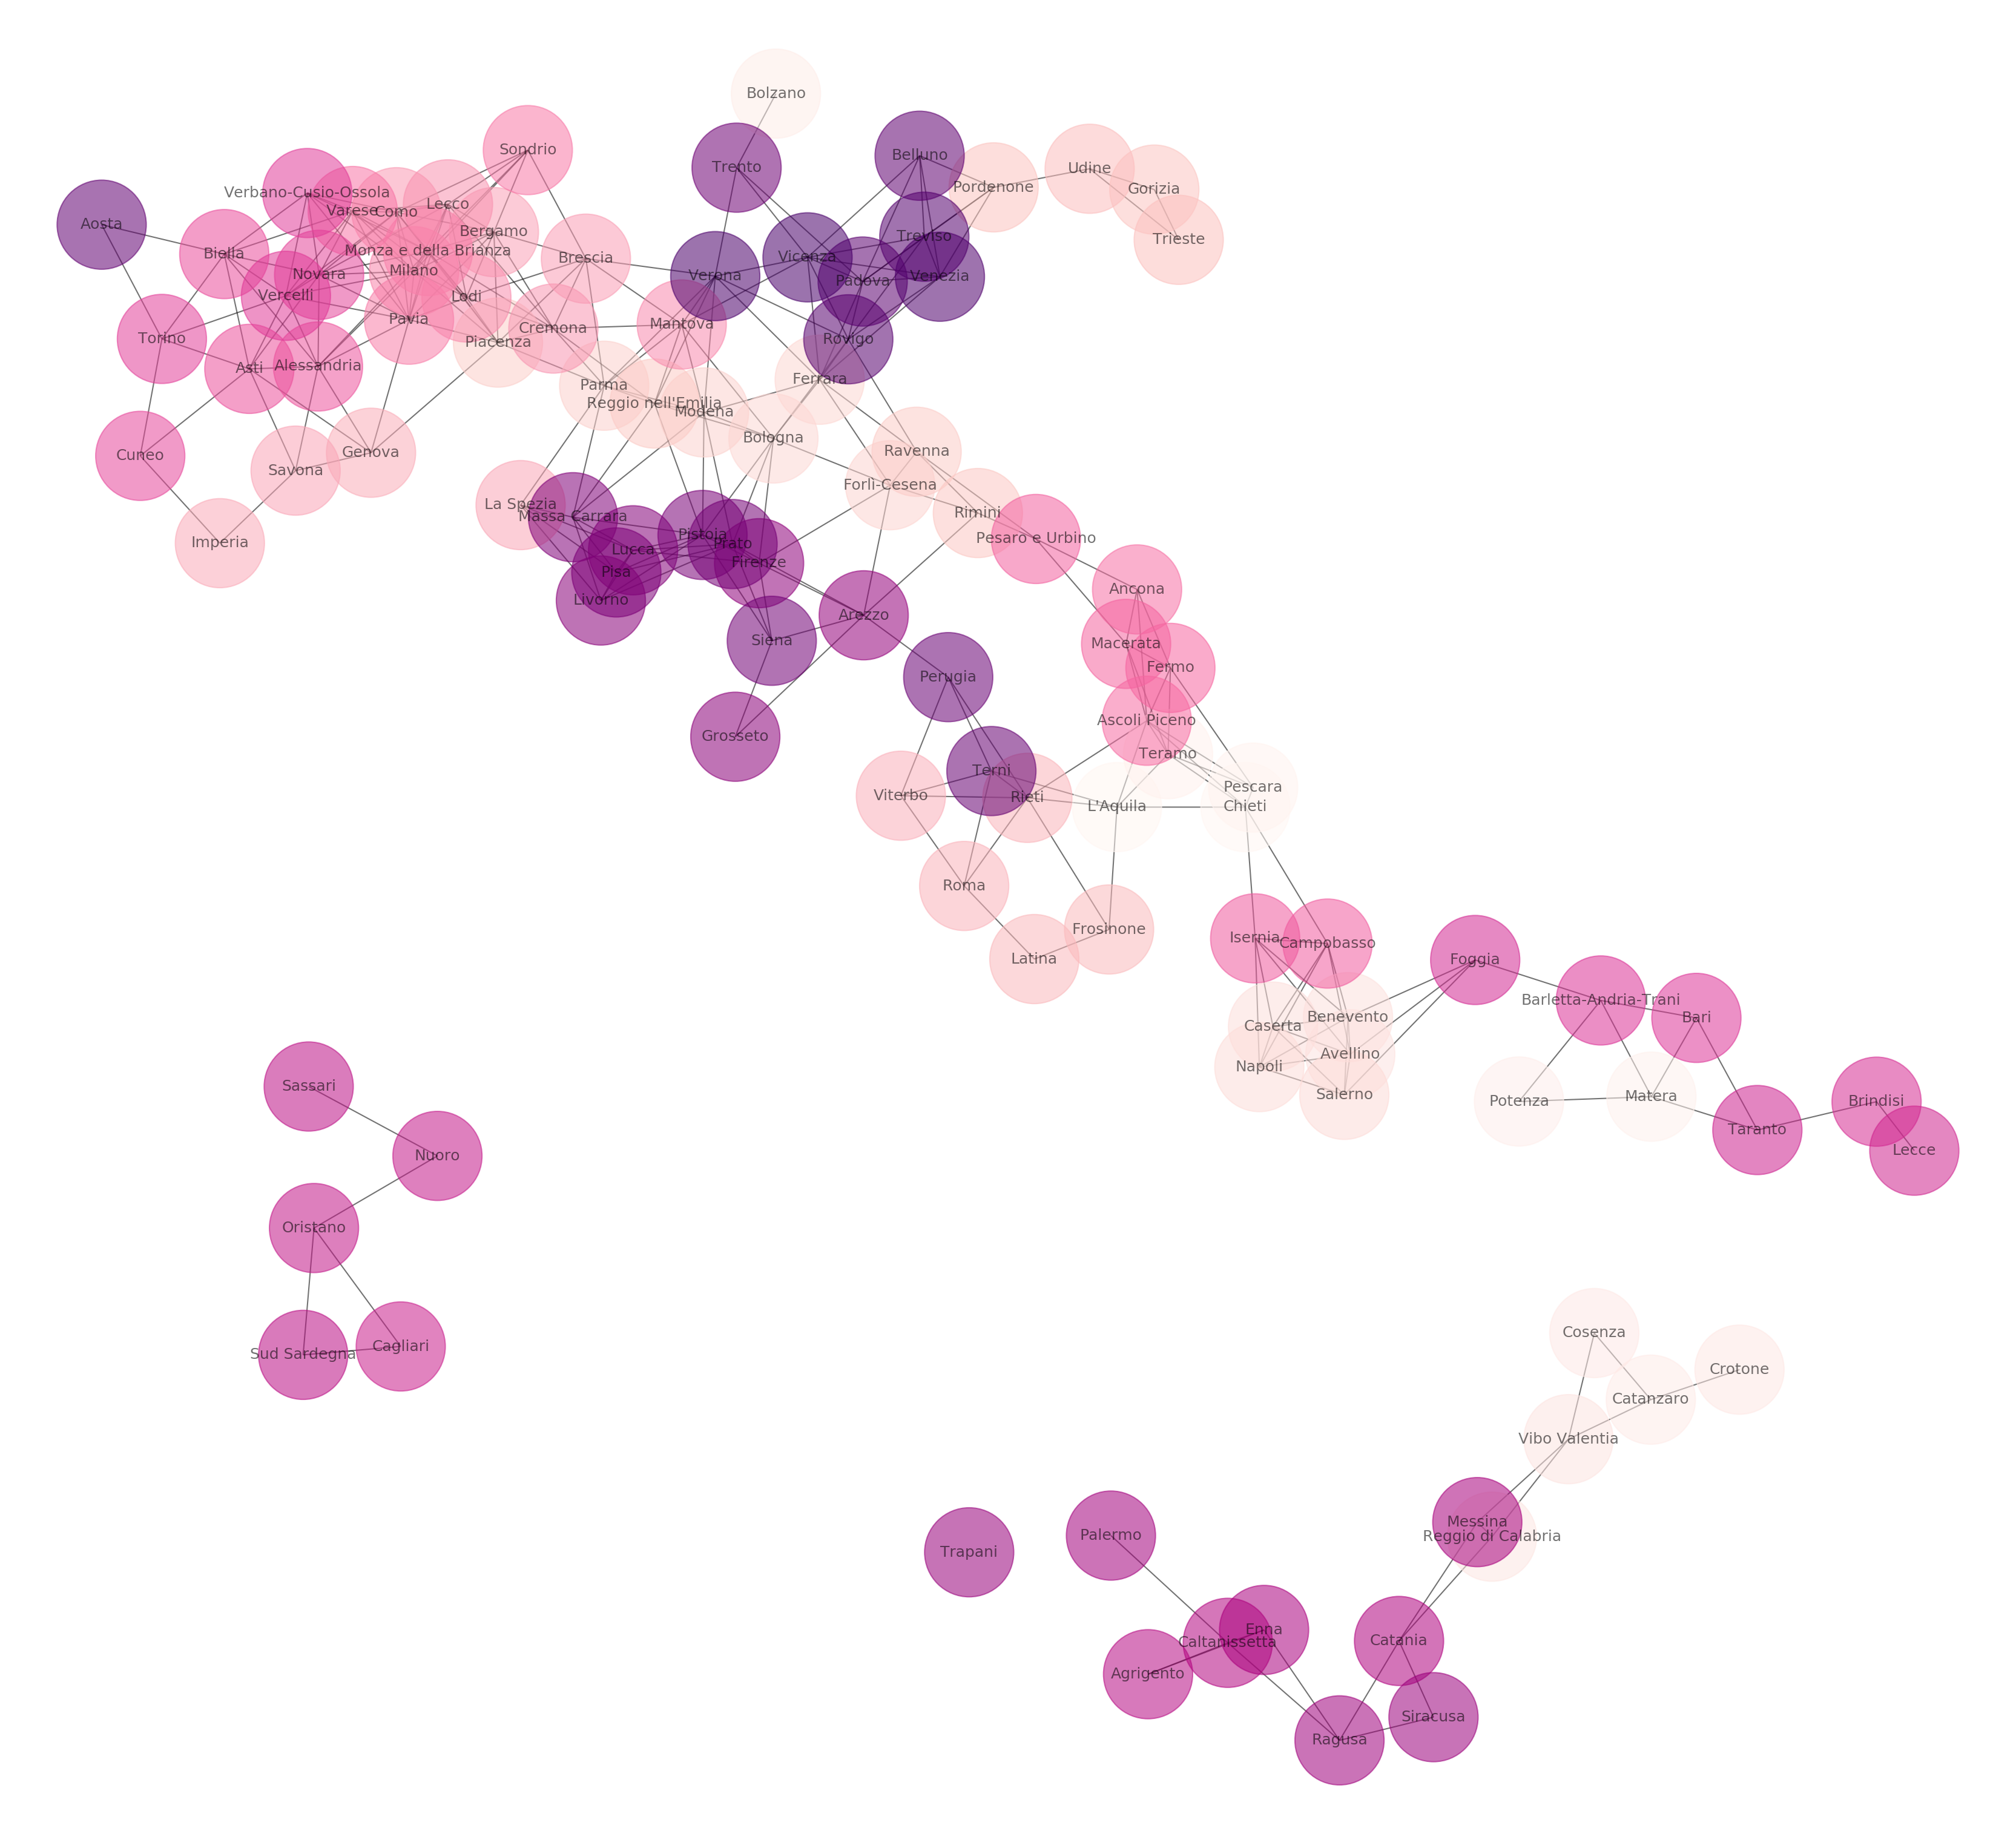

In [11]:
plt.figure(figsize=(22,20), dpi = 150)
makeUpGraph(graph,province, ['citta', 'long', 'lat'] )



In [12]:
builderGraph2=BuilderGraphWithMerge(0.8)
temp=province.copy()
graph1=builderGraph2.buildGraph(temp)
nx.is_isomorphic(graph, graph1)

True

In [13]:
builderGraph3=BuilderGraphNearestNeighbors(0.8)
temp=province.copy()
graph1=builderGraph3.buildGraph(temp)
nx.is_isomorphic(graph, graph1)

True

In [14]:
coordinates = [tuple(r) for r in province.to_numpy()]
builderGraph4=BuilderGraphWithRtree(0.8, coordinates)
graph1=builderGraph4.intersection()
nx.is_isomorphic(graph, graph1)

True

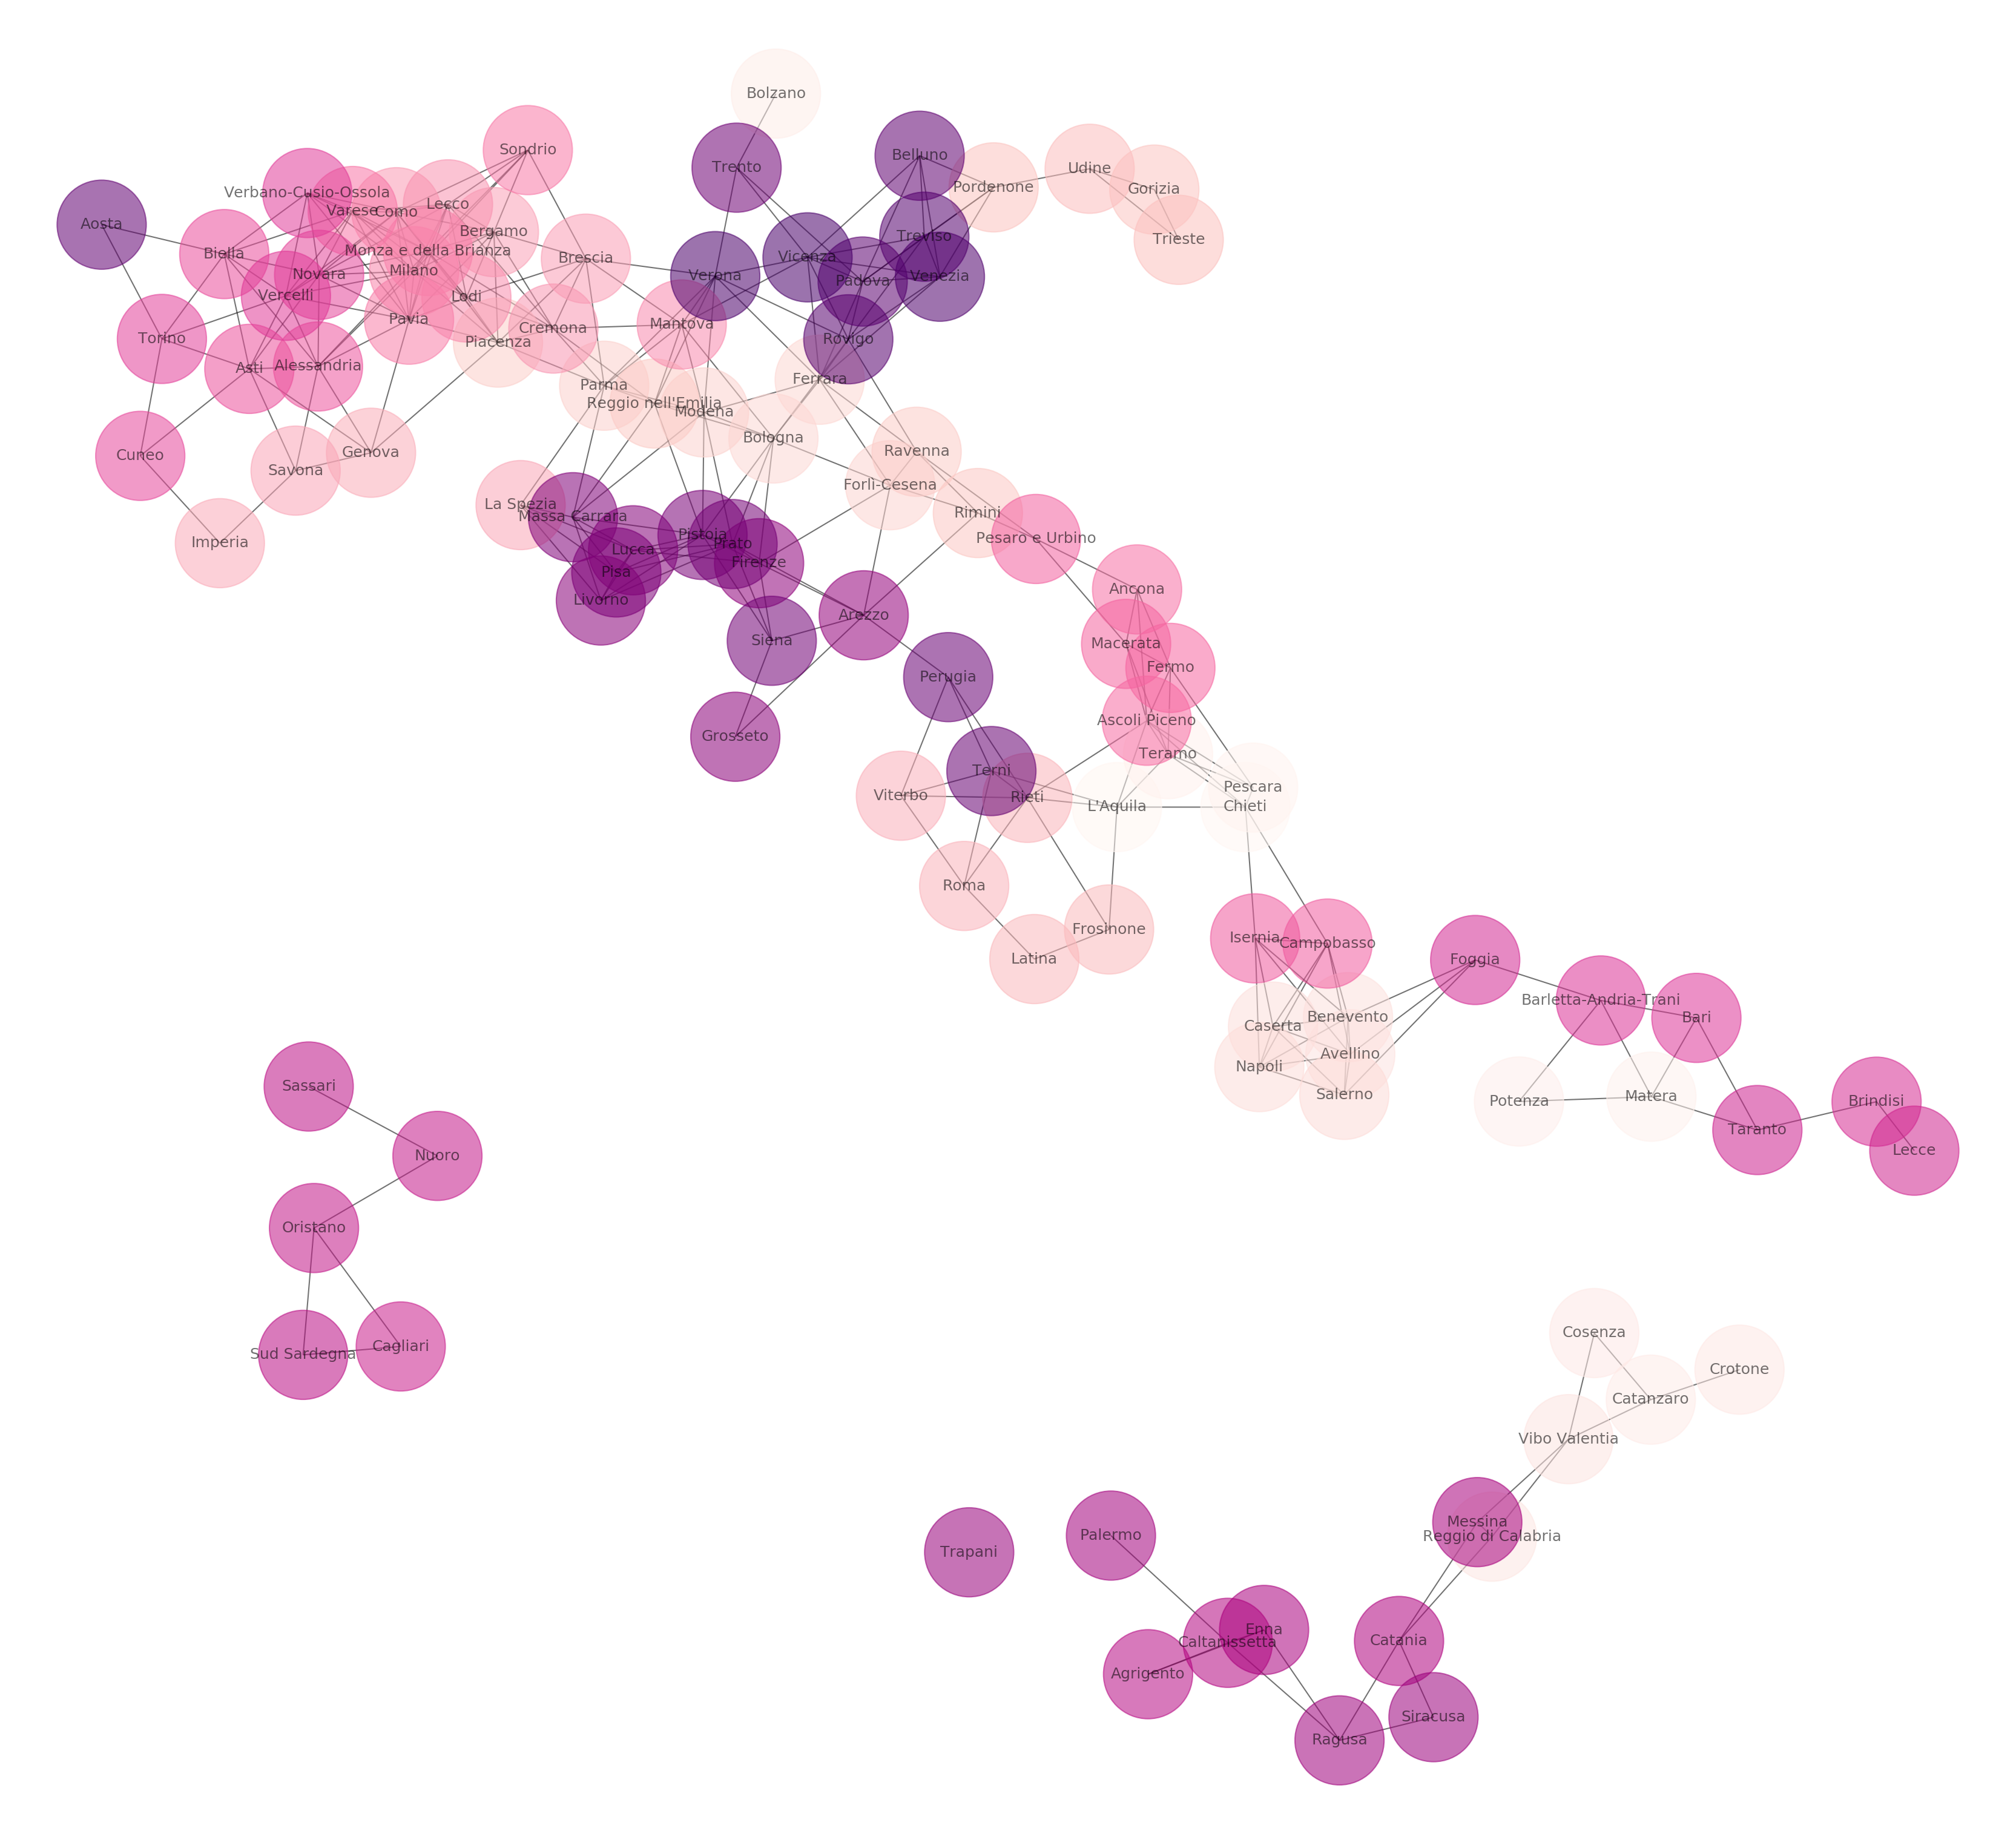

In [15]:
plt.figure(figsize=(22,20), dpi = 150)
makeUpGraph(graph1,province, ['citta', 'long', 'lat'] )


In [16]:
temp=province.copy()
%timeit builderGraph1.buildGraph(temp)


19.9 ms ± 1.96 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [17]:
temp=province.copy()
%timeit builderGraph2.buildGraph(temp)

675 ms ± 119 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [18]:
temp=province.copy()
%timeit builderGraph3.buildGraph(temp)

269 ms ± 8.57 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [19]:
%timeit builderGraph4.intersection()



7.85 ms ± 149 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
